Concatenate and pandaize data downloaded from CityProtect.
Given a folder, find all the files ending with "Los_Altos_Police_Department_report.csv", concatenate, and sort by date.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
import glob
import loaders.cityprotect as cp

In [8]:
dept = "Los Altos Police Department"
df = cp.cityprotect("../data/raw_data/{}".format(dept.replace(" ", "_")))

Loading from 24 files.


In [9]:
incident_types = set([a.strip() for b in df['incidentType'].str.split(';').values for a in b])

In [10]:
len(incident_types)

163

In [11]:
freqs = df['parentIncidentType'].value_counts()

In [12]:
freqs

Other                  41698
Proactive Policing     22147
Quality of Life         9299
Traffic                 6190
Fire                    1570
Theft                   1288
Property Crime           706
Breaking & Entering      529
Theft of Vehicle         293
Assault                  134
Robbery                   26
Name: parentIncidentType, dtype: int64

In [15]:
parentIncident_types = set([a.strip() for b in df['parentIncidentType'].str.split(';').values for a in b])

In [16]:
parentIncident_types

{'Assault',
 'Breaking & Entering',
 'Fire',
 'Other',
 'Proactive Policing',
 'Property Crime',
 'Quality of Life',
 'Robbery',
 'Theft',
 'Theft of Vehicle',
 'Traffic'}

In [17]:
monthly = {k: df[df["parentIncidentType"] == k].groupby(pd.Grouper(key="date", freq="M"))
           for k in parentIncident_types}

In [18]:
monthly_df = pd.DataFrame({k: monthly[k].count()["ccn"] for k in parentIncident_types}).fillna(0)

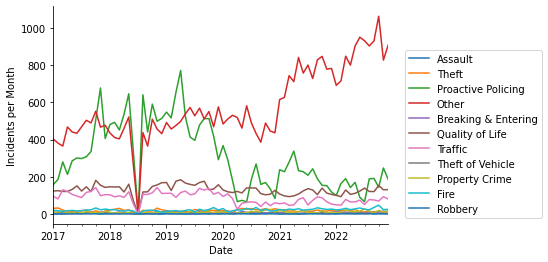

In [19]:
ax = monthly_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#plt.savefig("Stops_over_time.png", bbox_inches="tight")

In [20]:
set(df[df["parentIncidentType"]=="Other"]["incidentType"])

{'911',
 'ABANDONED BICYCLE',
 'ABANDONED VEHICLE',
 'ACCIDENT - NON VEHICULAR',
 'ALARM',
 'ALARM;RMS: ALARM',
 'ANIMAL',
 'ANIMAL CONTROL',
 'ANIMAL;XPTL - EXTRA PATROL',
 'ARSON',
 'ASCERTAIN PROBLEM',
 'ASSAULT WITH A DEADLY WEAPON',
 'ATTEMPT TO CONTACT',
 'AUTO BURGLARY',
 'BATTERY SPOUSE/COHAB',
 'BE ON THE LOOKOUT',
 'BIKE PATROL',
 'BOMB THREAT',
 'BRANDISHING A WPN',
 'BUSN AND PROF CODE VIOL',
 'CALL FOR HELP',
 'CHILD ABUSE',
 'CHILD LOCKED IN',
 'CITATION SIGN OFF',
 'CIVIL',
 'COMMUNITY RELATIONS',
 'CPS',
 'CPS;RMS: ALARM',
 'CRIMINAL THREATS',
 'CROWD (GATHERING/CONTROL)',
 'DEAD BODY',
 'DEFRAUDING AN INNKEEPER',
 'DISTURBANCE; MENTAL HEALTH ISSUE',
 'DOCUMENT SERVICE',
 'DOMESTIC VIOLENCE',
 'ELDER ABUSE',
 'ESCORT',
 'EVENT CREATED IN ERROR',
 'EXPLOSION',
 'FINANCIAL CRIME',
 'FINANCIAL CRIME;RMS: DMVL',
 'FIRE',
 'FIRE DEPT ASSIST',
 'FIRE INFORMATION',
 'FIREARM DISCHARGE (HEARD ONLY)',
 'FLAGGED DOWN BY CITIZEN IN FIELD',
 'FOLLOW UP',
 'FOUND',
 'FOUND;FICTITIOU

In [21]:
set(df[df["parentIncidentType"]=="Proactive Policing"]["incidentType"])

{'FOOT PATROL',
 'PED/BIKE STOP',
 'PED/BIKE STOP: SEND FILL',
 'TRAFFIC STOP',
 'TRAFFIC STOP: SEND FILL',
 'TRAFFIC STOP;DUI-IMPAIRED TO SLIGHTEST DEGREE',
 'TRAFFIC STOP;RMS: TRAFFIC OFFENSE'}

In [22]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft"]

In [23]:
violent_list = ["Assault", "Robbery"]

In [24]:
df[df["incidentType"]=="COMMERCIAL BURGLARY"].groupby(pd.Grouper(key="date", freq="M"))["ccn"].count()

date
2017-01-31     4
2017-02-28     0
2017-03-31     2
2017-04-30     3
2017-05-31     2
              ..
2022-08-31     4
2022-09-30     4
2022-10-31     3
2022-11-30    11
2022-12-31     3
Freq: M, Name: ccn, Length: 72, dtype: int64

In [25]:
crime_frame_dict = {"Property Crime": monthly_df[prop_list].sum(axis=1),
                    "Commercial Burglary": df[df["incidentType"]=="COMMERCIAL BURGLARY"].groupby(pd.Grouper(key="date", freq="M")
                                                                )["ccn"].count()}

In [26]:
crime_df = pd.DataFrame(crime_frame_dict)

In [27]:
crime_df

,Property Crime,Commercial Burglary
date,,
2017-01-31,51,4
2017-02-28,58,0
2017-03-31,45,2
2017-04-30,25,3
2017-05-31,22,2
...,...,...
2022-08-31,36,4
2022-09-30,33,4
2022-10-31,46,3


In [32]:
crime_df.index.min()

Timestamp('2017-01-31 00:00:00', freq='M')

In [34]:
xdates = [crime_df.index.min(), crime_df.index.max()]
y_avg = [crime_df["Property Crime"].mean(), crime_df["Property Crime"].mean()]

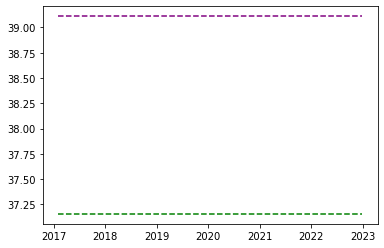

In [41]:
plt.plot(xdates, y_avg, linestyle="dashed", color="purple")
plt.plot(xdates, [0.95*y for y in y_avg], linestyle="dashed", color="green")

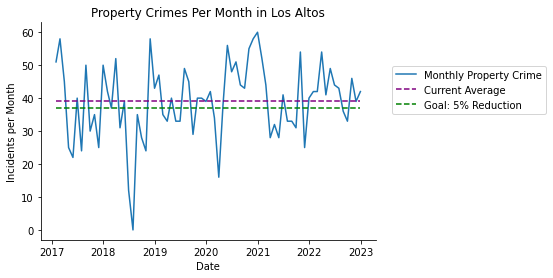

In [59]:
#ax = crime_df.plot()
f = plt.figure()
ax = plt.gca()
ax.plot(crime_df["Property Crime"], label="Monthly Property Crime")
ax.plot(xdates, y_avg, linestyle="dashed", color="purple", label="Current Average")
ax.plot(xdates, [0.95*y for y in y_avg], linestyle="dashed", color="green", label="Goal: 5% Reduction")
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title="Property Crimes Per Month in Los Altos")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
plt.savefig("Property_Crimes_per_Month.png", bbox_inches="tight")

In [24]:
avg_monthly_df = monthly_df[prop_list].rolling(window=3).mean()

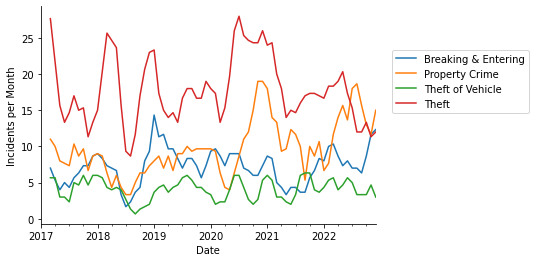

In [25]:
ax = avg_monthly_df[prop_list].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#.savefig("Stops_over_time.png", bbox_inches="tight")

In [147]:
avg_monthly_df=monthly_df[violent_list].rolling(window=3).mean()

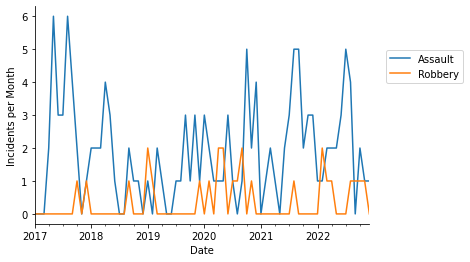

In [149]:
ax = monthly_df[violent_list].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#.savefig("Stops_over_time.png", bbox_inches="tight")

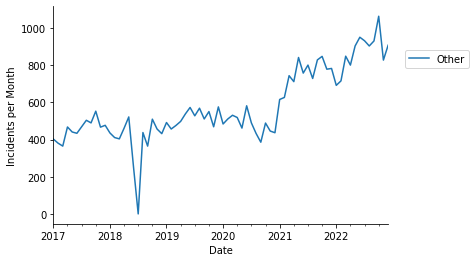

In [58]:
ax = monthly_df["Other"].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [59]:
other_df = df[df["parentIncidentType"]=="Other"]

In [61]:
other_incident_types = set([a.strip() for b in other_df['incidentType'].str.split(';').values for a in b])

In [62]:
other_incident_types

{'911',
 'ABANDONED BICYCLE',
 'ABANDONED VEHICLE',
 'ACCIDENT - NON VEHICULAR',
 'ALARM',
 'ANIMAL',
 'ANIMAL CONTROL',
 'ARSON',
 'ASCERTAIN PROBLEM',
 'ASSAULT WITH A DEADLY WEAPON',
 'ATTEMPT TO CONTACT',
 'AUTO BURGLARY',
 'BATTERY SPOUSE/COHAB',
 'BE ON THE LOOKOUT',
 'BIKE PATROL',
 'BOMB THREAT',
 'BRANDISHING A WPN',
 'BUSN AND PROF CODE VIOL',
 'CALL FOR HELP',
 'CFS TRANSPORT',
 'CHILD ABUSE',
 'CHILD LOCKED IN',
 'CITATION SIGN OFF',
 'CIVIL',
 'COMMUNITY RELATIONS',
 'CPS',
 'CRIMINAL DAMAGE-DEFACE-FELONY',
 'CRIMINAL THREATS',
 'CROWD (GATHERING/CONTROL)',
 'DEAD BODY',
 'DEFRAUDING AN INNKEEPER',
 'DISTURBANCE',
 'DOCUMENT SERVICE',
 'DOMESTIC VIOLENCE',
 'ELDER ABUSE',
 'ESCORT',
 'EVENT CREATED IN ERROR',
 'EXPLOSION',
 'FICTITIOUS/STOLEN/ALTERED/SUSPENDED PLATE',
 'FINANCIAL CRIME',
 'FIRE',
 'FIRE DEPT ASSIST',
 'FIRE INFORMATION',
 'FIREARM DISCHARGE (HEARD ONLY)',
 'FLAGGED DOWN BY CITIZEN IN FIELD',
 'FOLLOW UP',
 'FOUND',
 'GAS',
 'GENERAL EXPLOSION',
 'GENERAL W

In [63]:
other_monthly = {k: other_df[other_df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in other_incident_types}

In [65]:
other_monthly_df = pd.DataFrame({k: other_monthly[k].count()["ccn"] for k in other_incident_types}).fillna(0)

In [74]:
top_other = other_monthly_df.sum().sort_values(ascending=False).index.values[0:6]

In [75]:
top_other

array(['PATROL AREA CHECK', 'ALARM', '911', 'MUNI CODE VIOLATION',
       'MEDICAL EMERGENCY', 'INFO GENERAL'], dtype=object)

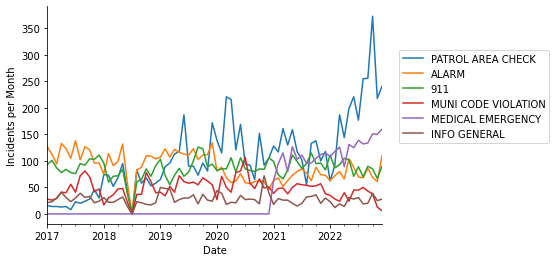

In [76]:
ax = other_monthly_df[top_other].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [28]:
df[df["incidentType"]=="RAPE"]

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative
39213,L220301028,2022-03-01 18:50:42,2022-03-02 14:21:46,LOS ALTOS,CA,94022,200 Block ALMOND AVE,RAPE,Other,Type: RAPE<br />Disposition: N NO REPORT TAKEN
41278,L220104007,2022-01-04 17:27:28,2022-01-05 02:39:20,LOS ALTOS,CA,94022,600 Block TORWOOD LN,RAPE,Other,Type: RAPE<br />Disposition: R REPORT TAKEN
77833,L211115012,2021-11-15 20:02:12,2021-11-16 10:11:12,LOS ALTOS,CA,94022,200 Block ALMOND AVE,RAPE,Other,Type: RAPE<br />Disposition: R REPORT TAKEN
78508,L211028046,2021-10-29 04:13:42,2021-10-29 18:01:16,LOS ALTOS,CA,94024,900 Block BERRY AVE,RAPE,Other,Type: RAPE<br />Disposition: R REPORT TAKEN
83237,L221015032,2022-10-16 03:38:12,2022-10-16 16:19:44,LOS ALTOS,CA,94022,NO ADDRESS DATA,RAPE,Other,Type: RAPE<br />Disposition: R REPORT TAKEN


In [82]:
propolicing_incident_types = set([a.strip() for b in df[df['parentIncidentType']=="Proactive Policing"]["incidentType"].str.split(';').values for a in b])

In [83]:
propolicing_incident_types

{'DUI-IMPAIRED TO SLIGHTEST DEGREE',
 'FOOT PATROL',
 'PED/BIKE STOP',
 'PED/BIKE STOP: SEND FILL',
 'RMS: TRAFFIC OFFENSE',
 'TRAFFIC STOP',
 'TRAFFIC STOP: SEND FILL'}

In [85]:
monthly_all = df.groupby(pd.Grouper(key="date", freq="M"))

In [86]:
monthly_all_df = pd.DataFrame(monthly_all.count()["ccn"] ).fillna(0)

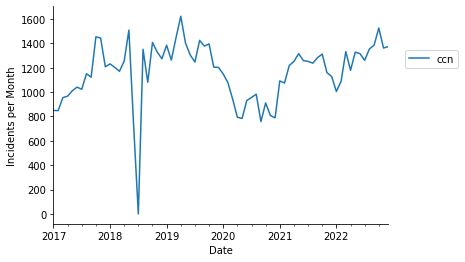

In [87]:
ax = monthly_all_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [89]:
incident_types

{'911',
 'ABANDONED BICYCLE',
 'ABANDONED VEHICLE',
 'ACCIDENT - NON VEHICULAR',
 'ACCIDENT MEDICS EN ROUTE',
 'ALARM',
 'ANIMAL',
 'ANIMAL CONTROL',
 'ARSON',
 'ASCERTAIN PROBLEM',
 'ASSAULT WITH A DEADLY WEAPON',
 'ASSAULT-INTENTIONAL/RECKLESSLY INJURE',
 'ATTEMPT TO CONTACT',
 'AUTO BURGLARY',
 'BATTERY',
 'BATTERY SPOUSE/COHAB',
 'BE ON THE LOOKOUT',
 'BIKE PATROL',
 'BOMB THREAT',
 'BRANDISHING A WPN',
 'BURGLARY 3RD DEGREE -- COMMERCIAL BUILDING',
 'BUSN AND PROF CODE VIOL',
 'CALL FOR HELP',
 'CFS TRANSPORT',
 'CHILD ABUSE',
 'CHILD LOCKED IN',
 'CITATION SIGN OFF',
 'CIVIL',
 'COMMERCIAL BURGLARY',
 'COMMUNITY RELATIONS',
 'CPS',
 'CRIMINAL DAMAGE-DEFACE-FELONY',
 'CRIMINAL THREATS',
 'CROWD (GATHERING/CONTROL)',
 'DEAD BODY',
 'DEFRAUDING AN INNKEEPER',
 'DISABLED VEH/TRAFF HAZARD',
 'DISORDERLY CONDUCT',
 'DISTURBANCE',
 'DOCUMENT SERVICE',
 'DOMESTIC VIOLENCE',
 'DRUNK DRIVER',
 'DUI-IMPAIRED TO SLIGHTEST DEGREE',
 'ELDER ABUSE',
 'ESCORT',
 'EVENT CREATED IN ERROR',
 'EXPLO

In [90]:
import re

In [91]:
reg=re.compile('ACCID')

In [95]:
accid_types = list(filter(reg.search, incident_types))

In [96]:
accid_types

['UNK INJURY ACCIDENT',
 'RMS ACCIDENT INVOLVING DAMAGE TO VEHICLE > $200',
 'NON INJURY ACCIDENT',
 'ACCIDENT - NON VEHICULAR',
 'MINOR INJURY ACCIDENT',
 'MAJOR INJURY ACCIDENT',
 'ACCIDENT MEDICS EN ROUTE']

In [97]:
accid_monthly = {k: df[df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in accid_types}

In [98]:
accid_monthly_df = pd.DataFrame({k: accid_monthly[k].count()["ccn"] for k in accid_types}).fillna(0)

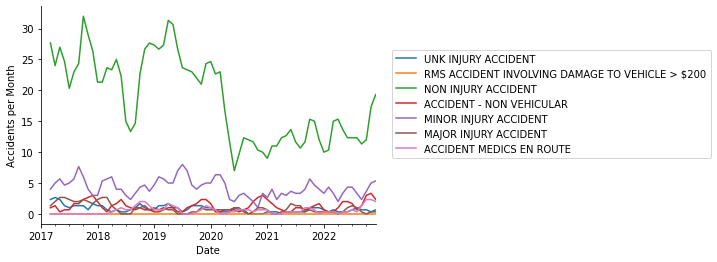

In [150]:
ax = accid_monthly_df.rolling(window=3).mean().plot()
ax.set(xlabel="Date", ylabel="Accidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [102]:
pac_df = df[df["incidentType"]=="PATROL AREA CHECK"]

In [113]:
nar = pac_df.iloc[[31]]["date"]

In [151]:
pac_df["narrative"].str.replace(' +', ' ')

/tmp/ipykernel_3076/1130871980.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pac_df["narrative"].str.replace(' +', ' ')


31       Type: PATROL AREA CHECK<br />Disposition: N NO...
186      Type: PATROL AREA CHECK<br />Disposition: N NO...
296      Type: PATROL AREA CHECK<br />Disposition: ADV ...
519      Type: PATROL AREA CHECK<br />Disposition: H AS...
533      Type: PATROL AREA CHECK<br />Disposition: ADV ...
                               ...                        
83938    Type: PATROL AREA CHECK<br />Disposition: N NO...
83939    Type: PATROL AREA CHECK<br />Disposition: N NO...
83941    Type: PATROL AREA CHECK<br />Disposition: N NO...
83942    Type: PATROL AREA CHECK<br />Disposition: N NO...
83943    Type: PATROL AREA CHECK<br />Disposition: N NO...
Name: narrative, Length: 7711, dtype: object

In [153]:
nar_list = [x for x in pac_df["narrative"].str.replace(' +', ' ')]

/tmp/ipykernel_3076/164164286.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  nar_list = [x for x in pac_df["narrative"].str.replace(' +', ' ')]


In [154]:
nar_list

['Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: H ASST. RENDERED/AGENCY ASST.',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: CAN CANCELLED CALL(DISPATCH)',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: CAN CANCELLED CALL(DISPATCH)',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: H ASST. RENDERED/AGENCY ASST.',
 'Type: PATROL A

In [155]:
set(nar_list)

{'Type: PATROL AREA CHECK<br />Disposition: A ARREST ON VIEW',
 'Type: PATROL AREA CHECK<br />Disposition: ADV ADVISED EVENT/INFO ONLY BOL',
 'Type: PATROL AREA CHECK<br />Disposition: C CRIMINAL CITATION',
 'Type: PATROL AREA CHECK<br />Disposition: CAN CANCELLED CALL(DISPATCH)',
 'Type: PATROL AREA CHECK<br />Disposition: D TRAFFIC CITATION',
 'Type: PATROL AREA CHECK<br />Disposition: DUP DUPLICATE CALL',
 'Type: PATROL AREA CHECK<br />Disposition: F FI CARD',
 'Type: PATROL AREA CHECK<br />Disposition: G GOA/UTL',
 'Type: PATROL AREA CHECK<br />Disposition: H ASST. RENDERED/AGENCY ASST.',
 'Type: PATROL AREA CHECK<br />Disposition: L FILL UNIT',
 'Type: PATROL AREA CHECK<br />Disposition: M MALFUNCTION (ALARMS)',
 'Type: PATROL AREA CHECK<br />Disposition: N NO REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: O OK (ALARMS)',
 'Type: PATROL AREA CHECK<br />Disposition: R REPORT TAKEN',
 'Type: PATROL AREA CHECK<br />Disposition: S SUPPLEMENTAL REPORT TAKEN',
 'Type: PATROL

In [160]:
pac_df["narrative"].str.replace(' +', ' ').str.upper().value_counts()

/tmp/ipykernel_3076/3137617586.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pac_df["narrative"].str.replace(' +', ' ').str.upper().value_counts()


TYPE: PATROL AREA CHECK<BR />DISPOSITION: N NO REPORT TAKEN                  6967
TYPE: PATROL AREA CHECK<BR />DISPOSITION: H ASST. RENDERED/AGENCY ASST.       397
TYPE: PATROL AREA CHECK<BR />DISPOSITION: ADV ADVISED EVENT/INFO ONLY BOL     205
TYPE: PATROL AREA CHECK<BR />DISPOSITION: W WARNING                            49
TYPE: PATROL AREA CHECK<BR />DISPOSITION: CAN CANCELLED CALL(DISPATCH)         36
TYPE: PATROL AREA CHECK<BR />DISPOSITION: F FI CARD                            14
TYPE: PATROL AREA CHECK<BR />DISPOSITION: G GOA/UTL                            14
TYPE: PATROL AREA CHECK<BR />DISPOSITION: U UNFOUNDED                           6
TYPE: PATROL AREA CHECK<BR />DISPOSITION: R REPORT TAKEN                        5
TYPE: PATROL AREA CHECK<BR />DISPOSITION: C CRIMINAL CITATION                   4
TYPE: PATROL AREA CHECK<BR />DISPOSITION: M MALFUNCTION (ALARMS)                4
TYPE: PATROL AREA CHECK<BR />DISPOSITION: O OK (ALARMS)                         3
TYPE: PATROL ARE

In [125]:
pac_df["narrative"]=pac_df["narrative"].str.strip()

/tmp/ipykernel_3076/3944300574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pac_df["narrative"]=pac_df["narrative"].str.strip()


In [161]:
reg = re.compile("COMM")

In [164]:
comm_list = list(filter(reg.search, incident_types))

In [167]:
comm_list

['BURGLARY 3RD DEGREE -- COMMERCIAL BUILDING',
 'COMMERCIAL BURGLARY',
 'COMMUNITY RELATIONS']

In [165]:
comm_df = df[df["incidentType"].isin(comm_list)]

In [166]:
comm_df

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative
700,L170610032,2017-06-11 03:32:25,2017-08-25 00:21:54,LOS ALTOS,CA,94022,5000 Block EL CAMINO REAL,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
1099,L170530014,2017-05-30 19:57:38,2017-08-25 00:21:52,LOS ALTOS,CA,94022,800 Block N SAN ANTONIO RD,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: N ...
1534,L170518002,2017-05-18 12:01:32,2017-08-25 00:21:49,LOS ALTOS,CA,94022,100 Block MAIN ST,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
2482,L170416008,2017-04-16 18:25:12,2017-08-25 00:21:22,LOS ALTOS,CA,94022,700 Block DISTEL DR,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
2566,L170415008,2017-04-15 11:16:07,2017-08-25 00:21:41,LOS ALTOS,CA,94022,4700 Block EL CAMINO REAL,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
...,...,...,...,...,...,...,...,...,...,...
82044,L221109021,2022-11-09 23:56:01,2022-11-10 15:21:05,LOS ALTOS,CA,94024,2300 Block HOMESTEAD RD,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
82229,L221105008,2022-11-05 10:08:37,2022-11-05 20:16:15,LOS ALTOS,CA,94024,2100 Block GRANT RD,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...
83381,L221012029,2022-10-12 22:18:02,2022-10-13 06:10:39,LOS ALTOS,CA,94040,2400 Block W EL CAMINO REAL,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: CA...
83583,L221008009,2022-10-08 11:54:48,2022-10-08 23:15:05,LOS ALTOS,CA,94022,4700 Block EL CAMINO REAL,COMMERCIAL BURGLARY,Breaking & Entering,Type: COMMERCIAL BURGLARY<br />Disposition: R ...


In [168]:
comm_monthly = {k: df[df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in comm_list}

In [169]:
comm_monthly_df = pd.DataFrame({k: comm_monthly[k].count()["ccn"] for k in comm_list}).fillna(0)

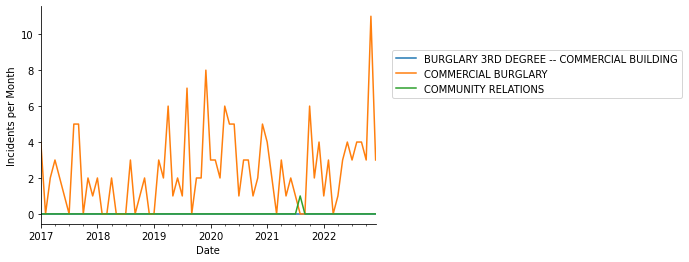

In [171]:
ax = comm_monthly_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [52]:
df[df["blocksizedAddress"].str.contains("SELIG") == True].sort_values("date")

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative
22240,L170218035,2017-02-19 05:30:14,2017-08-25 00:21:00,LOS ALTOS,CA,94024,1700 Block SELIG LN,GRAND THEFT,Property Crime,Type: GRAND THEFT<br />Disposition: R REPORT T...
2258,L170424026,2017-04-25 01:09:08,2017-08-25 00:21:24,LOS ALTOS,CA,94024,1700 Block SELIG LN,INFO GENERAL,Other,Type: INFO GENERAL<br />Disposition: ADV ADVIS...
767,L170608046,2017-06-09 01:36:26,2017-08-25 00:21:54,LOS ALTOS,CA,94024,HARWALT DR AND SELIG LN,VEHICLE CODE VIOL,Traffic,Type: VEHICLE CODE VIOL<br />Disposition: G GO...
63300,L171123002,2017-11-23 09:29:25,2017-12-06 20:26:02,LOS ALTOS,CA,94024,1700 Block SELIG LN,DISTURBANCE,Quality of Life,Type: DISTURBANCE<br />Disposition: N NO REPOR...
66758,L181207048,2018-12-07 21:32:54,2018-12-21 00:37:13,LOS ALTOS,CA,94024,1700 Block SELIG LN,SUSPICIOUS VEHICLE,Quality of Life,Type: SUSPICIOUS VEHICLE<br />Disposition: N ...
35291,L210314016,2021-03-15 02:48:03,2021-03-15 17:12:13,LOS ALTOS,CA,94024,1700 Block SELIG LN,PETTY THEFT,Theft,Type: PETTY THEFT<br />Disposition: N NO REPO...
15836,L210503008,2021-05-03 16:34:10,2021-05-04 00:34:50,LOS ALTOS,CA,94024,1700 Block SELIG LN,911,Other,Type: 911<br />Disposition: N NO REPORT TAKEN
13606,L210623032,2021-06-24 01:16:01,2021-06-24 12:12:59,LOS ALTOS,CA,94024,1700 Block SELIG LN,INFO GENERAL,Other,Type: INFO GENERAL<br />Disposition: ADV ADVI...
78721,L211024076,2021-10-24 22:54:30,2021-10-25 09:52:39,LOS ALTOS,CA,94024,1700 Block SELIG LN,STORM RELATED,Other,Type: STORM RELATED<br />Disposition: T TRANS...
77951,L211111027,2021-11-11 23:37:58,2021-11-12 08:45:08,LOS ALTOS,CA,94024,1700 Block SELIG LN,MEDICAL EMERGENCY,Other,Type: MEDICAL EMERGENCY<br />Disposition: T T...
